In [1]:
from fbm import FBM
from matplotlib import pyplot as plt

In [82]:
f = FBM(n=19, hurst=0.5, length=1, method='daviesharte')

fbm_path1 = f.fbm()
times1 = f.times()

fbm_path2 = f.fbm()
times2 = f.times()

### Generacja ścieżek fBm

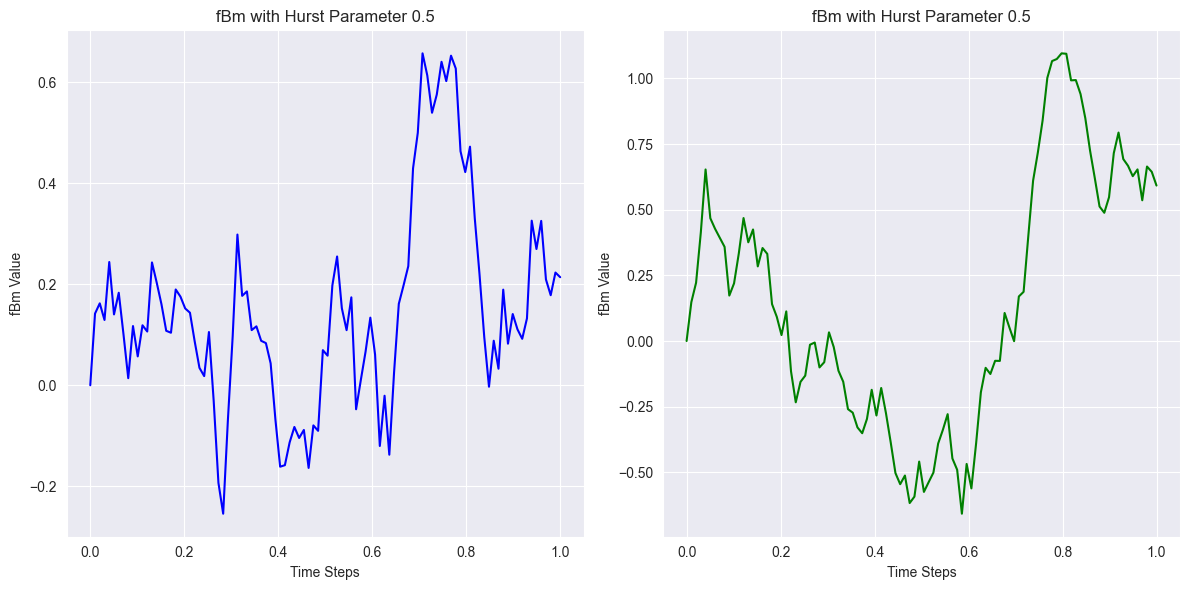

In [70]:
# plot fbm_sample with times
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first fBm path
ax1.plot(times1, fbm_path1, color='blue')
ax1.set_title('fBm with Hurst Parameter 0.5')
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('fBm Value')
ax1.grid(True)

# Plot the second fBm path
ax2.plot(times2, fbm_path2, color='green')
ax2.set_title('fBm with Hurst Parameter 0.5')
ax2.set_xlabel('Time Steps')
ax2.set_ylabel('fBm Value')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()

### Histogramy dla ścieżek fbm

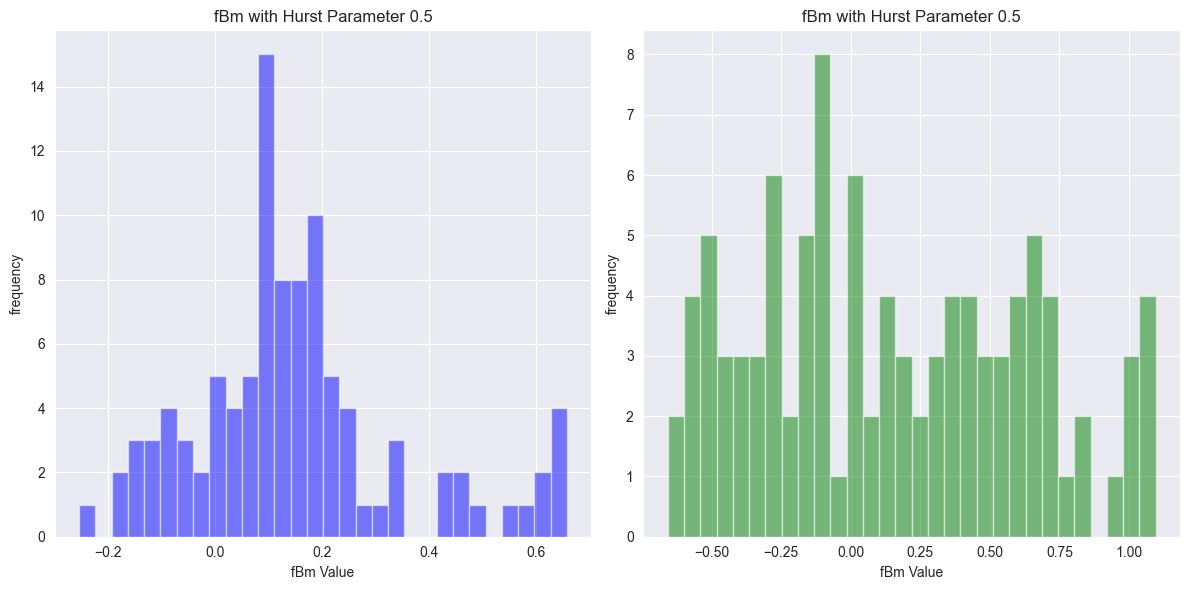

In [71]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first fBm path
ax1.hist(fbm_path1, bins=30, color='blue', alpha=0.5)
ax1.set_title('fBm with Hurst Parameter 0.5')
ax1.set_xlabel('fBm Value')
ax1.set_ylabel('frequency')
ax1.grid(True)

# Plot the second fBm path
ax2.hist(fbm_path2, bins=30, color='green', alpha=0.5)
ax2.set_title('fBm with Hurst Parameter 0.5')
ax2.set_xlabel('fBm Value')
ax2.set_ylabel('frequency')
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()

### Dystrybucja brzegowa fBm

 dla n ścieżek po czasie t

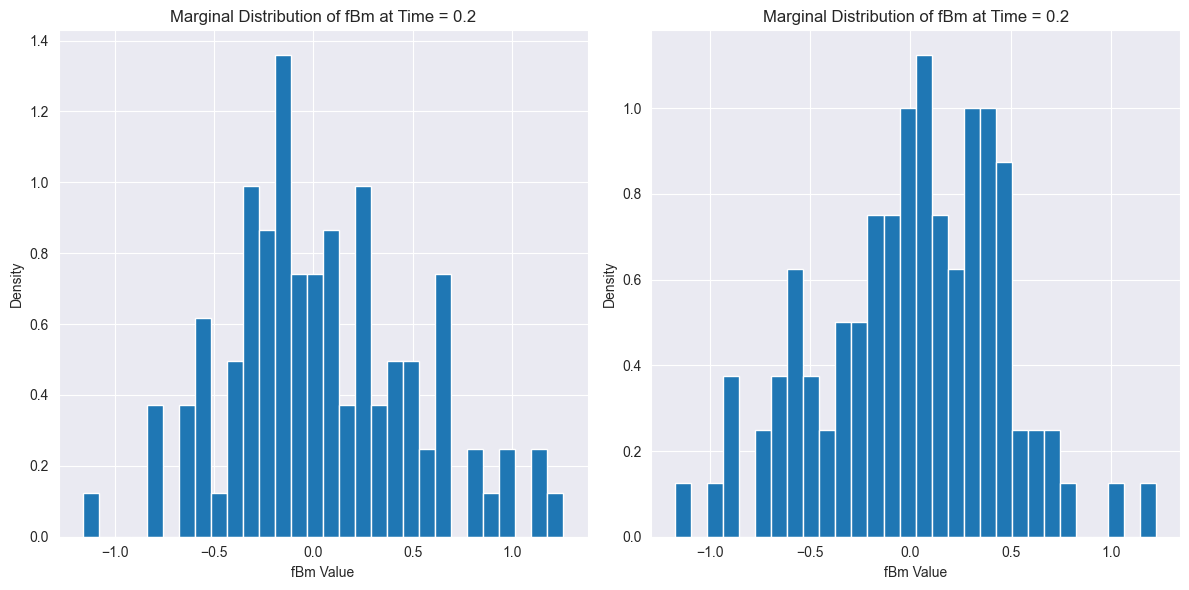

In [72]:
# Parameters
n_paths = 100  # number of fBm paths to simulate
n_points = 100  # number of points in each path
hurst = 0.5     # Hurst parameter
time1 = 0.2     # time at which to observe the marginal distribution
time2 = 0.2 # time at which to observe the marginal distribution

# Generate fBm paths
f = FBM(n=n_points, hurst=hurst, length=1, method='daviesharte')
fbm_values_at_time1 = [f.fbm()[int(time1*n_points)] for _ in range(n_paths)]  # Extract the end value of each path
f = FBM(n=n_points, hurst=hurst, length=1, method='daviesharte')
fbm_values_at_time2 = [f.fbm()[int(time2*n_points)] for _ in range(n_paths)]  # Extract the end value of each path

# Plot marginal distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(fbm_values_at_time1, bins=30, density=True)
ax1.set_title(f'Marginal Distribution of fBm at Time = {time1}')
ax1.set_xlabel('fBm Value')
ax1.set_ylabel('Density')
ax1.grid(True)

ax2.hist(fbm_values_at_time2, bins=30, density=True)
ax2.set_title(f'Marginal Distribution of fBm at Time = {time2}')
ax2.set_xlabel('fBm Value')
ax2.set_ylabel('Density')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [73]:
from scipy.stats import norm
import plotly.express as px
import pandas as pd
from statsmodels.distributions.copula.api import GaussianCopula

gaussian = GaussianCopula()

unif_1 = norm.cdf(fbm_values_at_time1)
unif_2 = norm.cdf(fbm_values_at_time2)
norm_data = pd.concat([pd.DataFrame(unif_1), pd.DataFrame(unif_2)], axis=1)
std_data = pd.concat([pd.DataFrame(fbm_values_at_time1), pd.DataFrame(fbm_values_at_time2)], axis=1)
std_data.columns = ['X', 'Y']
norm_data.columns = ['X', 'Y']
norm_data.corr()

fig = px.scatter(std_data, x = 'X', y='Y', width=700, height=500, trendline='ols', trendline_color_override='DeepPink', marginal_x='histogram', marginal_y='histogram', title='Bi-Variate Normal')
fig.show()

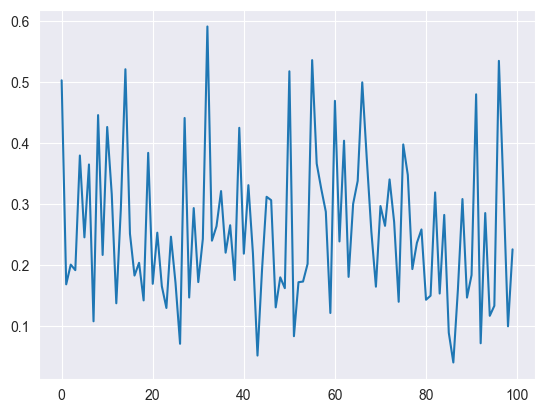

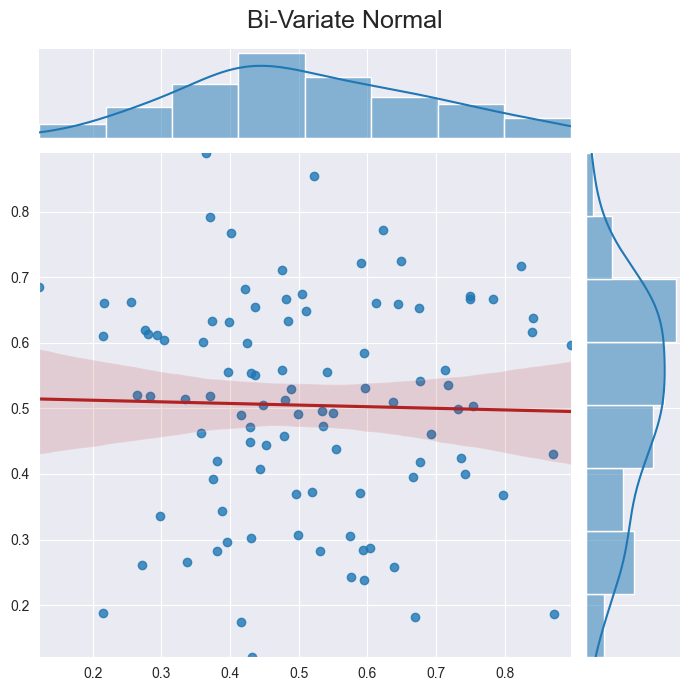

In [75]:
import seaborn as sns

joint_plot_height = 7
joint_grid = sns.jointplot(x=unif_1, y=unif_2, kind="reg", height=joint_plot_height, xlim=(unif_1.min(), unif_1.max()), ylim=(unif_2.min(), unif_2.max()),
                           joint_kws={"line_kws": {"color": "firebrick"}})

plt.suptitle("Bi-Variate Normal", fontsize=18)
plt.tight_layout()

In [76]:
import numpy as np

correlation_coefficient = np.corrcoef([fbm_values_at_time1, fbm_values_at_time2])[0, -1]
print(f"Corrlation between fbms: {correlation_coefficient:.4f}")

Corrlation between fbms: -0.0282


D:\Software\Projects\MiNI\S7\Fraktale\Projekt 2\fraktale-projekt2\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:5999: RuntimeWarning:

divide by zero encountered in divide

D:\Software\Projects\MiNI\S7\Fraktale\Projekt 2\fraktale-projekt2\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:719: RuntimeWarning:

invalid value encountered in sqrt

D:\Software\Projects\MiNI\S7\Fraktale\Projekt 2\fraktale-projekt2\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:5990: RuntimeWarning:

divide by zero encountered in power



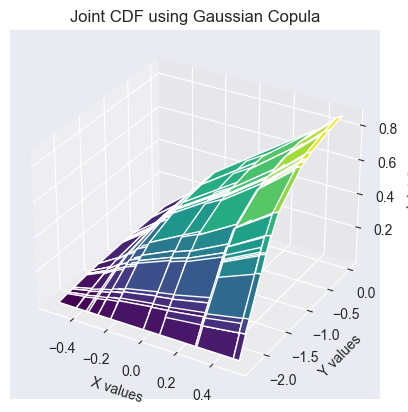

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from copulas.multivariate import GaussianMultivariate

# Create a grid of points
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(fbm_path1, fbm_path2)

# Convert points to their CDF values using the normal distribution
u = norm.cdf(X)
v = norm.cdf(Y)

# Combine the CDF values using a Gaussian copula
copula = GaussianMultivariate()
copula.fit(np.column_stack([u.flatten(), v.flatten()]))
cdf_values = copula.cdf(np.column_stack([u.flatten(), v.flatten()]))

# Reshape for plotting
Z = cdf_values.reshape(20, 20)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X values')
ax.set_ylabel('Y values')
ax.set_zlabel('Joint CDF')
ax.set_title('Joint CDF using Gaussian Copula')

plt.show()